In [1]:
import polars as pl
from collections import OrderedDict
from polars import datatypes as dt

In [4]:
df = pl.scan_csv("../nyc_cab_data.csv")

In [11]:
df.describe()

statistic,hvfhs_license_num,dispatching_base_num,originating_base_num,request_datetime,on_scene_datetime,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,shared_request_flag,shared_match_flag,access_a_ride_flag,wav_request_flag,wav_match_flag
str,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,str
"""count""","""18479031""","""18479031""","""13587039""","""18479031""","""13587039""","""18479031""","""18479031""",1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,1.8479031e7,"""18479031""","""18479031""","""18479031""","""18479031""","""18479031"""
"""null_count""","""0""","""0""","""4891992""","""0""","""4891992""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""0""","""0"""
"""mean""",null,null,null,null,null,null,null,139.310488,142.68349,4.870138,1094.634034,21.555652,1.034738,0.681976,1.830261,1.115767,0.190491,0.977665,16.784667,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,75.105315,78.039054,5.655499,745.330416,18.01144,3.757672,0.609669,1.487345,1.349234,0.665083,2.788658,14.182204,null,null,null,null,null
"""min""","""HV0003""","""B02764""","""B02026""","""2022-12-31T20:…","""2022-12-31T21:…","""2023-01-01T00:…","""2023-01-01T00:…",1.0,1.0,0.0,0.0,-146.34,0.0,0.0,0.0,0.0,0.0,0.0,-102.15,"""N""","""N""",""" ""","""N""","""N"""
"""25%""",null,null,null,null,null,null,null,75.0,76.0,1.55,575.0,10.43,0.0,0.31,0.87,0.0,0.0,0.0,7.7,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,140.0,142.0,2.897,906.0,16.26,0.0,0.49,1.39,0.0,0.0,0.0,12.61,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,211.0,220.0,6.015,1404.0,26.17,0.0,0.81,2.27,2.75,0.0,0.0,20.99,null,null,null,null,null
"""max""","""HV0005""","""B03406""","""B03406""","""2023-02-01T00:…","""2023-01-31T23:…","""2023-01-31T23:…","""2023-02-01T01:…",265.0,265.0,407.563,35359.0,1455.12,184.37,64.71,120.91,8.25,6.9,180.53,1285.04,"""Y""","""Y""","""N""","""Y""","""Y"""


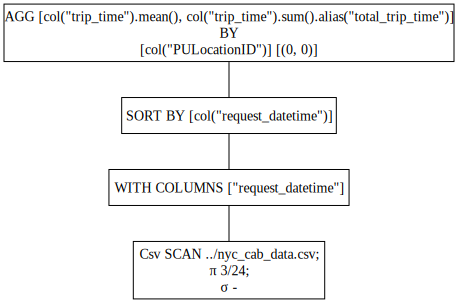

In [5]:
(
    df.with_columns(
        pl.col("request_datetime").cast(dt.Datetime, strict=True),
        pl.col("on_scene_datetime").cast(dt.Datetime, strict=True),
        pl.col("pickup_datetime").cast(dt.Datetime, strict=True),
        pl.col("dropoff_datetime").cast(dt.Datetime, strict=True),
    ).sort(pl.col("request_datetime"))
    .group_by(pl.col("PULocationID"))
    .agg(
        pl.mean("trip_time"),
        pl.sum("trip_time").alias("total_trip_time")
    )
).show_graph(optimized=True)

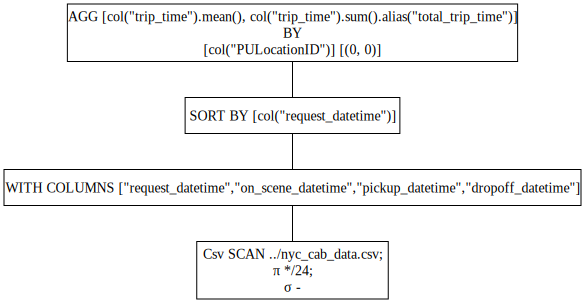

In [6]:
(
    df.with_columns(
        pl.col("request_datetime").cast(dt.Datetime, strict=True),
        pl.col("on_scene_datetime").cast(dt.Datetime, strict=True),
        pl.col("pickup_datetime").cast(dt.Datetime, strict=True),
        pl.col("dropoff_datetime").cast(dt.Datetime, strict=True),
    ).sort(pl.col("request_datetime"))
    .group_by(pl.col("PULocationID"))
    .agg(
        pl.mean("trip_time"),
        pl.sum("trip_time").alias("total_trip_time")
    )
).show_graph(optimized=False)

In [ ]:
(
    df.with_columns(
        pl.col("request_datetime").cast(dt.Datetime, strict=True),
        pl.col("on_scene_datetime").cast(dt.Datetime, strict=True),
        pl.col("pickup_datetime").cast(dt.Datetime, strict=True),
        pl.col("dropoff_datetime").cast(dt.Datetime, strict=True),
    ).sort(pl.col("request_datetime"))
    .group_by(pl.col("PULocationID"))
    .agg(
        pl.mean("trip_time"),
        pl.sum("trip_time").alias("total_trip_time")
    )
).collect(no_optimization=True)